
# Project: Investigate a Dataset (TMDB-MOVIES DATA ANALYSIS)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset info**: This dataset contains information about movies collected from The Movie Database (TMDB), and it has 10866 rows and 21 columns initially that includes (id, imdb_id,	popularity,	budget,	revenue, original_title, ...). 

>In this project we will be analysing key variables in order to draw insights from them. For example, we will look at the particular genre that has generated the highest revenue over time, how the revenue of a movie is related with it's popularity (this insight is necessary because there are some movies produced that don't have much popularity internationally but has a great box-office revenue) so it is important to figure out the relationship between these variable.

> some of the questions we tend to ask, given this dataset includes:
#### Questions

**> What type of genre has the highest movie budget over the years? (Top 5)**

**> Which of the genre generated the highest revenue over the years? (Top 5)**

**> How is the vote_average distributed?**

**> Do movies with higher popularity receive better ratings?**

**> Is there any singnificant relationship between revenue and popularity?**

**> What is the trend of movie duration over the years?**

**> How is the most revenue generating genre rated in the last five years of the dataset period?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load Dataset using the pandas read_csv method and print out the top 5 rows to confirm if the load was successful 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# finding out the Dataset shape
df.shape

(10866, 21)

The dataset is made up of 10866 Rows and 21 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Dataset Properties:
> This dataset originally comes with 11 Columns that have strings(Objects) as the Dtype. 

> This dataset originally comes with 6 columns that have integers(int) as the Dtype.

> This dataset originally comes with 4 columns that have float as the Dtype.

> some columns have missing values in them i.e (null).

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Summary of the dataset Descriptive statistics

### Data Cleaning
##### Here the dataset will be assess to identify any problem in the data's quality or structure. Afterwards, the data will be cleaned by modifying, replacing or removing data to ensure that the dataset is of the highest quality & wll-structured.



In [6]:
# Check for Duplicates
df.duplicated().sum()

1

Using the duplicated and sum method on the dataframe, it reveals that there is a row that is being duplicated and this row has to be removed.

In [7]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The duplicated row

In [8]:
#confirm the duplicated rows
df.loc[2089:2090, :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


An evidence of the duplicated rows

In [9]:
# Drop the duplicates
df.drop_duplicates(inplace=True)


In [10]:
df.loc[2089:2091, :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2091,60309,tt0968264,0.591206,25000000,15478800,The Conspirator,Evan Rachel Wood|James McAvoy|Kevin Kline|Robi...,http://www.conspiratorthemovie.com/,Robert Redford,One bullet killed the President. But not one man.,...,Mary Surratt is the lone female charged as a c...,122,Crime|Drama|History,Wildwood Enterprises|American Film Company,9/10/10,78,5.9,2010,25000000.0,15478800.0


The Duplicated Row is being dropped and it is checked to confirm.

In [11]:
#convert the release_date column to the right dtype (datetime)
df.release_date = pd.to_datetime(df.release_date)

In [12]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The release_date column is converted to the right dtype

In [13]:
# Check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Checking for Null values
> the columns with null values in them are (imdb_id, cast, hompage, director, tagline, keywords, overview, runtime, genres,
                                            production_companies).

#### Dropping Null values
##### There is no optimal way to treat missing values, we can only do the following depending on the characteristics of dataframe and the task
> Removing unnecessary columns not relevent for our analysis.

> Remove missing values.

> Replacing the missing values.

In [14]:
# Drop unnecessary columns
drop_col = ['overview', 'keywords', 'tagline', 'homepage','imdb_id']
df.drop(drop_col, axis=1, inplace=True)
df.drop(['production_companies'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

After dropping some uncessary columns, there are 3 columns left with null values in them

In [16]:
# dropping rows with more than 3 missing values
df.dropna(axis=0, thresh=3, inplace=True)
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

we try to drop rows with more than 3 missing values but there was none

In [17]:
# check if there are dates that are invalid
wrong_release_date = df.query('release_date > "2015-12-31"')
wrong_release_date.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,62,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
9720,871,1.152937,5800000,33395426,Planet of the Apes,Charlton Heston|Roddy McDowall|Kim Hunter|Maur...,Franklin J. Schaffner,112,Adventure|Science Fiction|Mystery,2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
9721,10331,1.058272,114000,0,Night of the Living Dead,Duane Jones|Judith O'Dea|Karl Hardman|Marilyn ...,George A. Romero,96,Horror,2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00
9722,26690,0.891163,0,0,The Boston Strangler,Tony Curtis|Henry Fonda|George Kennedy|Mike Ke...,Richard Fleischer,116,Crime|Drama|Mystery|Thriller,2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00
9723,8069,0.867192,0,0,Barbarella,Jane Fonda|John Phillip Law|Anita Pallenberg|M...,Roger Vadim,98,Science Fiction,2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00


There are rows with Dates in the ['release_date'] columns that are not valid, it is ideal that we drop those rows

In [18]:
# we drop these invalid dates
df.drop(wrong_release_date.index, axis=0, inplace=True)

In [19]:
# drop null values in the specified columns
df.dropna(subset=['genres', 'cast', 'director'], inplace=True)

# check to confirm if all null values are dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

All null values successfully removed

#### Spliting values
> **Here**: there are values or characters which are delimeted with pipes (|) in the genres, we have to split thsese characters  and assigned to them seperate rows in-order to analyze them individually. 

In [20]:
# split the values in the genres column
df.genres = df.genres.str.split("|")

# creating new rows for the splitted values
df = df.explode("genres")

# verify 
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,Colin Eggleston,92,Horror,1978-10-14,17,6.1,1978,0.000000e+00,0.000000e+00
10818,39995,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,Colin Eggleston,92,Thriller,1978-10-14,17,6.1,1978,0.000000e+00,0.000000e+00
10818,39995,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,Colin Eggleston,92,Mystery,1978-10-14,17,6.1,1978,0.000000e+00,0.000000e+00
10819,16214,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,Hal Needham,107,Action,1978-07-28,13,6.0,1978,0.000000e+00,2.607307e+08


Each genres are successfully splitted into seperate columns

## Exploratory Data Analysis

#### Q1. What type of genre has the highest movie budget over the years? (Top 5)

In [21]:
df.groupby(['genres'])['budget'].sum()

genres
Action             65777453609
Adventure          54925759768
Animation          16153922143
Comedy             50261612068
Crime              23837893762
Documentary          280061440
Drama              56061562367
Family             28634201565
Fantasy            29809378053
Foreign              240439640
History             5996643047
Horror             10183494870
Music               3761960040
Mystery            12998550090
Romance            21282422277
Science Fiction    30640977564
TV Movie              44700000
Thriller           49894111563
War                 5475764133
Western             3057238783
Name: budget, dtype: int64

In [22]:
Top_gen_bud = df.groupby(['genres'])['budget'].sum().nlargest(n=5)
Top_gen_bud

genres
Action       65777453609
Drama        56061562367
Adventure    54925759768
Comedy       50261612068
Thriller     49894111563
Name: budget, dtype: int64

In [40]:
sns.set_style('darkgrid')

# Defining a chart function
def creat_barchart(df, x_label, y_label, chart_title, color):
    """ we creat a barchart function, with the axis labels, title and colors...  """
    chart=df.plot(kind='bar', title=chart_title, color=color, figsize=(8, 5), legend=True)
    chart.set_xlabel(x_label, fontsize=13)
    chart.set_ylabel(y_label, fontsize=13)
    chart.set_title(chart_title, fontsize=14)
    return chart

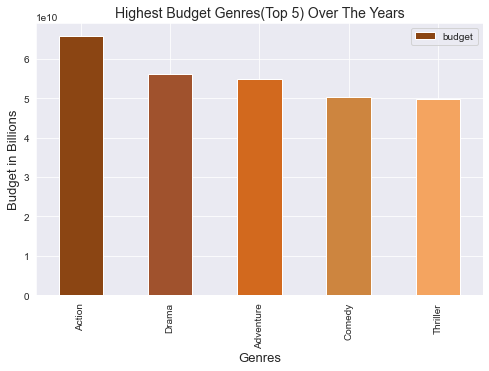

In [41]:
creat_barchart(df=Top_gen_bud, x_label='Genres',
               y_label='Budget in Billions',
               chart_title='Highest Budget Genres(Top 5) Over The Years',
               color=['saddlebrown', 'sienna', 'chocolate', 'peru', 'sandybrown']);

**Findings:** For the duration of the Dataset,the genre with the highest movie budget is **Action** with an amount of ($65,777,453,609$) and the genre that has the least overall budget is **Tv Movie** with ($44,700,000$) in Total.

#### Q2. Which of the genre generated the highest revenue over the years? (Top 5)

In [25]:
 df.groupby(['genres'])['revenue'].sum()

genres
Action             172116808220
Adventure          164724072264
Animation           52126588611
Comedy             141463328393
Crime               56922509177
Documentary          1025863469
Drama              136941221557
Family              88298554220
Fantasy             88108037160
Foreign               274846449
History             10224531754
Horror              27458888763
Music               11180330360
Mystery             32364429695
Romance             60183311857
Science Fiction     85923445738
TV Movie               42000000
Thriller           120157776724
War                 12324889018
Western              4470524950
Name: revenue, dtype: int64

In [26]:
Top_gen_rev = df.groupby(['genres'])['revenue'].sum().nlargest(n=5)
Top_gen_rev

genres
Action       172116808220
Adventure    164724072264
Comedy       141463328393
Drama        136941221557
Thriller     120157776724
Name: revenue, dtype: int64

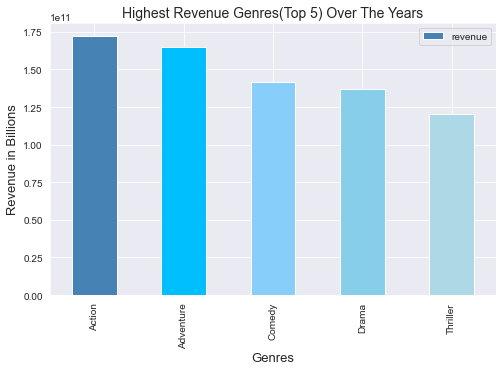

In [42]:
creat_barchart(df=Top_gen_rev, x_label='Genres',
               y_label='Revenue in Billions',
               chart_title='Highest Revenue Genres(Top 5) Over The Years',
               color=['steelblue', 'deepskyblue', 'lightskyblue', 'skyblue', 'lightblue']);

**Findings:** For the duration of the Dataset,the genre with the highest movie revenue is **Action** with an amount of ($172,116,808,220$) and the genre that has the least revenue is **Tv Movie** with ($42,000,000$) in Total.

#### Q3. How is the vote_average distributed?

In [28]:
# to know how the vote_average is distributed, we need to determine the mean
df.vote_average.mean()

5.934860557768945

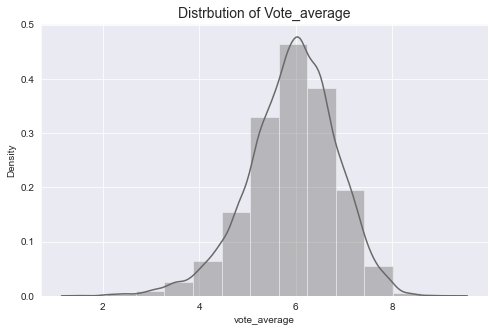

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Distribution plot of vote_average
f, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df.vote_average, bins=13, color='dimgray')
plt.title('Distrbution of Vote_average', fontsize=14);

**Findings:** The distribution of vote_average column of the dataset is **skewed-to-the-left** which indicates that there are more vote_average values to the left of the mean (5.93486) in the distribution

#### Q4. Do movies with higher popularity receive better ratings?

In [30]:
#find the median value of popularity
df.popularity.median()

0.420915

In [31]:
# select sample with popularity lower than the median
low_popularity = df.query('popularity < 0.420915')

# select sample with popularity greater than or equal to the median
high_popularity = df.query('popularity >= 0.420915')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_popularity['vote_average'].count() + high_popularity['vote_average'].count() 

True

In [32]:
# we get the mean vote_average rating for both high & low popularity group and append it to a list
list1 = []
means = low_popularity['vote_average'].mean(), high_popularity['vote_average'].mean()
for i in means:
    list1.append(i)
print(list1)

[5.7689062500000405, 6.100788939228275]


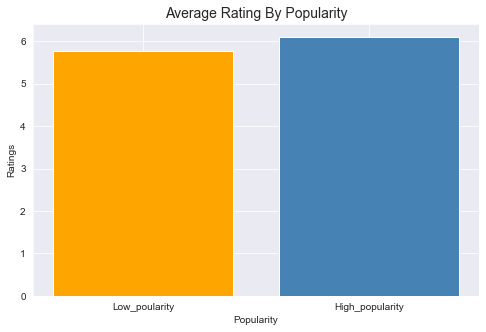

In [39]:
colors=['orange','steelblue']
f, ax = plt.subplots(figsize=(8, 5))
plt.bar([1, 2], list1, tick_label=['Low_poularity', 'High_popularity'], color=colors,)
plt.title('Average Rating By Popularity', fontsize=14)
plt.xlabel('Popularity')
plt.ylabel('Ratings');

**Findings:** Movies with high popularity tends to have higher ratings compared to movies with low popularity.

#### Q5. Is there any singnificant relationship between revenue and popularity?

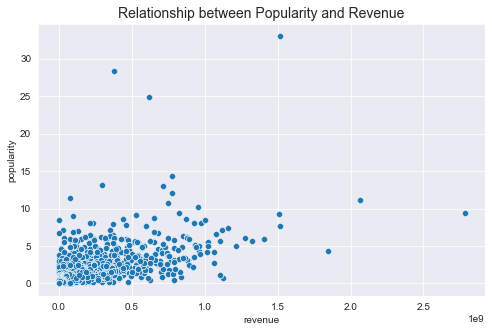

In [34]:
f, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x='revenue', y='popularity')
plt.title('Relationship between Popularity and Revenue', fontsize=14);

**Findings:** There is No correlation between revenue and popularity

#### Q6. What is the trend of movie duration over the years?

In [35]:
run = df.groupby(['release_year'], as_index=False)['runtime'].mean()

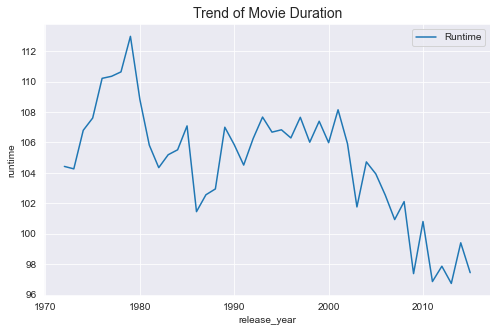

In [36]:
f, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=run, x='release_year', y='runtime', legend=True)
plt.title('Trend of Movie Duration', fontsize=14)
plt.legend(labels=['Runtime']);

**Findings:** According to the chart, it is evident that the movie runtime has declined over the years.

#### Q7. How is the most revenue generating genre rated in the last five years of the dataset period

In [37]:
# filter out the last five years in the dataset
last_5 = df.query('release_year == [2011, 2012, 2013, 2014, 2015] ')

# descriptive statistics of Action (Higest revenue generating genre) in the last 5 years of the dataset
last_5[last_5.genres == 'Action'].groupby(['release_year'])['vote_average'].describe()

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
2011,115.0,5.757391,0.878202,3.0,5.25,5.80,6.40,8.1
2012,99.0,5.461616,1.219711,2.0,4.90,5.60,6.20,7.6
2013,119.0,5.602521,1.121550,2.2,5.10,5.70,6.35,7.8
2014,129.0,5.642636,1.106781,2.4,5.10,5.60,6.30,7.9
2015,106.0,5.611321,1.010829,3.3,5.00,5.55,6.30,7.7


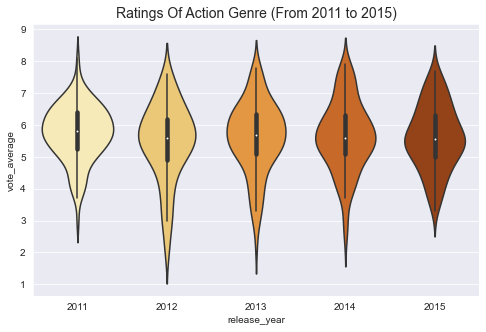

In [38]:
f, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=last_5[last_5.genres == 'Action'], x='release_year', y='vote_average', palette='YlOrBr')
plt.title('Ratings Of Action Genre (From 2011 to 2015)', fontsize=14);

**Insights:** Action which is the most revenue generating movie genre is rated according the following:
> 2011 - Majority of it's ratings falls between the range of 5 & 7, having the maximum rating at 8.1.

> 2012 - The observe ratings are majorly between the range of 5 & 6, having it's minimum drop to the lowest at 2.0.

> 2013 - The ratings are mostly between 5 & 6.5.

> 2014 - This year has better ratings overall, compared to the previous two years.

> 2015 - The mininimum rating this year is 3.3 (highest among the previous years) and majority of the vote_averages lies between 5 & 6.

## Conclusions

**Limitations**
> Analyzing this dataset comes with a bunch of limitations in the Data wrangling process, **from** checking up on duplicated values/rows, dealing wih NAN (null) values **to** modifying the dataset in order to have a quality structure.

**Insights**
> It was revealed that Action is the movie genre with the highest budget & revenue, while Tv Movies genre is the lowest in both categories. It should be known that over the years, the runtime of movies has declined repeatedly and movies with higher popularity tends to have better ratings on the average.

> The ratings of movies also have a distribution that is skewed-to-the-left, with a mean value of (5.93486). The correlation between revenue genrated by a movie and it's popularity  was checked and it was revealed that there is No relationship between the popularity of movies & the revenue generated by theose movies.